In [11]:
from pynq import Overlay
import numpy as np
overlay = Overlay('overlay/sobel_core.bit')

In [13]:
overlay.ip_dict
#help(overlay)

{'conv_0': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb0280650>,
  'driver': pynq.overlay.DefaultIP,
  'fullpath': 'conv_0',
  'gpio': {},
  'interrupts': {},
  'mem_id': 's_axi_CTRL_BUS',
  'parameters': {'C_M_AXI_CTRL_BUS_ADDR_WIDTH': '32',
   'C_M_AXI_CTRL_BUS_ARUSER_WIDTH': '1',
   'C_M_AXI_CTRL_BUS_AWUSER_WIDTH': '1',
   'C_M_AXI_CTRL_BUS_BUSER_WIDTH': '1',
   'C_M_AXI_CTRL_BUS_CACHE_VALUE': '"0011"',
   'C_M_AXI_CTRL_BUS_DATA_WIDTH': '32',
   'C_M_AXI_CTRL_BUS_ENABLE_ID_PORTS': 'false',
   'C_M_AXI_CTRL_BUS_ENABLE_USER_PORTS': 'false',
   'C_M_AXI_CTRL_BUS_ID_WIDTH': '1',
   'C_M_AXI_CTRL_BUS_PROT_VALUE': '"000"',
   'C_M_AXI_CTRL_BUS_RUSER_WIDTH': '1',
   'C_M_AXI_CTRL_BUS_USER_VALUE': '0x00000000',
   'C_M_AXI_CTRL_BUS_WUSER_WIDTH': '1',
   'C_S_AXI_CTRL_BUS_ADDR_WIDTH': '5',
   'C_S_AXI_CTRL_BUS_BASEADDR': '0x43C00000',
   'C_S_AXI_CTRL_BUS_DATA_WIDTH': '32',
   'C_S_AXI_CTRL_BUS_HIGHADDR': '0x43C0FFFF',
   'Component_Name': 'design_1_conv_0_0',
 

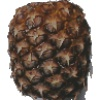

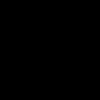

AttributeError: 'DefaultIP' object has no attribute 'sendchannel'

In [15]:
import pynq
import numpy as np
from PIL import Image
from IPython.display import display
from pynq import DefaultIP
from pynq import Xlnk
from pynq import Overlay

overlay = Overlay('overlay/sobel_core.bit')
conv = overlay.conv_0

#display the original image
fruit = Image.open("pineapple.jpg")
fruit.load()
display(fruit)

#load interfacing
xlnk=Xlnk()
input_buffer = xlnk.cma_array(shape=(100,100,3), dtype=np.uint8, cacheable=1)
output_buffer = xlnk.cma_array(shape=(100,100,3), dtype=np.uint8, cacheable=1)
hex(in_buffer.physical_address)
hex(out_buffer.physical_address)
input_array=in_buffer[0:100*100*3]
buffer_image = Image.fromarray(in_buffer)
display(buffer_image)

conv.sendchannel.transfer(fruit)
conv.recvchannel.transfer(fruit)
conv.sendchannel.wait()
conv.recvchannel.wait()